<a href="https://colab.research.google.com/github/mesoma-hub/machine-learning/blob/main/stroke_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra

In [ ]:
url = 'https://raw.githubusercontent.com/mesoma-hub/machine-learning/main/stroke_data.csv'
data = pd.read_csv(url)
data.head()


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB




---
Plotting a histogram of the dataset

**bins: Since the dataset is fairly large, using a higher number of bins helps in visualizing the distribution of the data more clearly.
figsize: Adjusts the figsize to ensure the plots are large enough to be legible, without being too large.**

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'work_type'}>],
       [<Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'smoking_status'}>,
        <Axes: title={'center': 'stroke'}>, <Axes: >]], dtype=object)

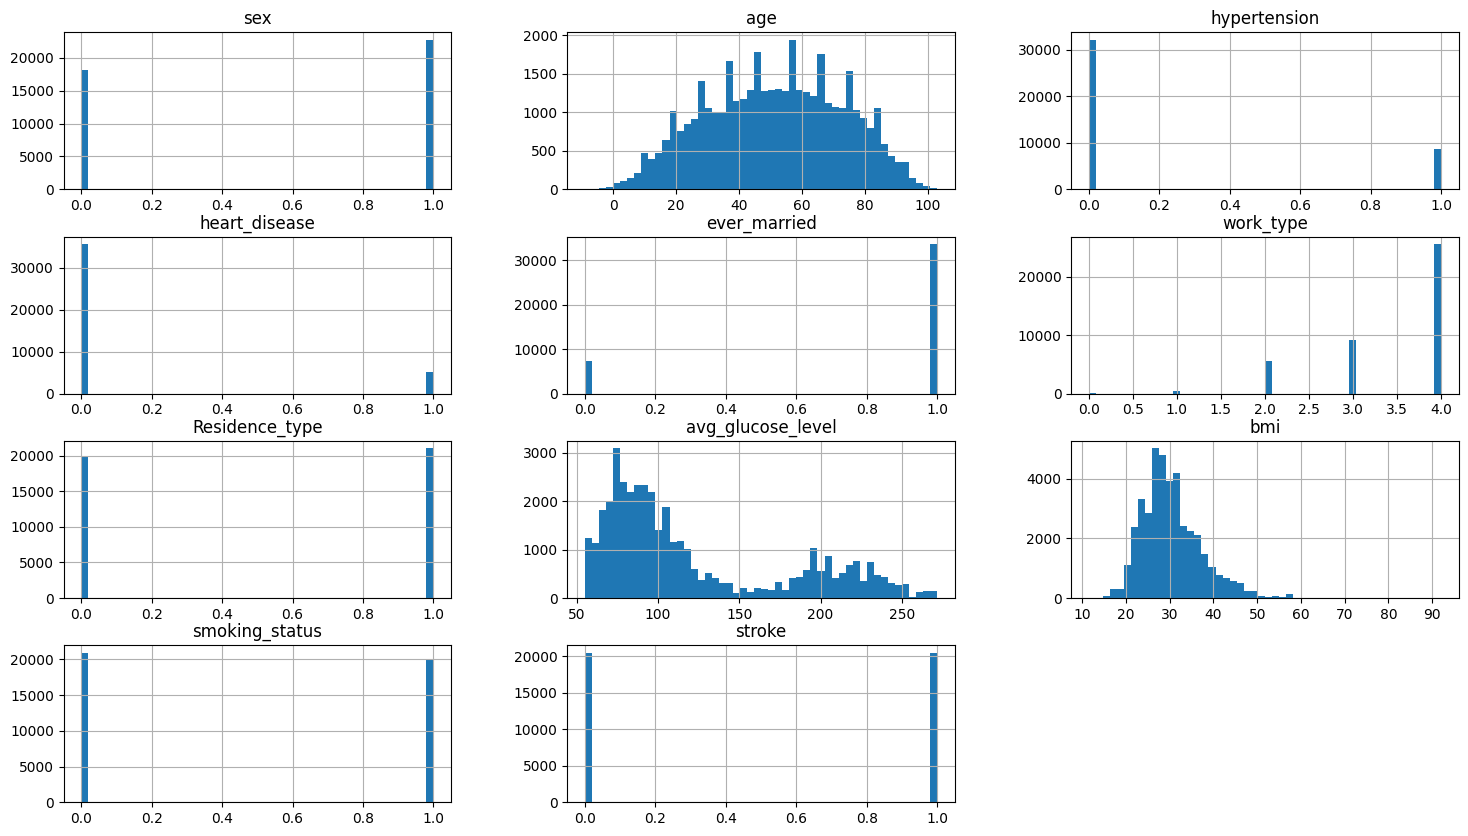

In [ ]:
data.hist(bins=50, figsize=(18, 10))

In [ ]:
data["stroke"].value_counts()

stroke
1    20460
0    20450
Name: count, dtype: int64

**Stats about the data**

In [ ]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


**Ensure that there is no duplication of data**

In [ ]:
data.duplicated().any()

False

**Shape of the data**

In [ ]:
data.shape

(40910, 11)

**Working with numerical data**

In [ ]:
numerical_data = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical_data

['sex',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

**From the above code we can see the numerical data from the dataset.**


This code creates a histogram with a Kernel Density Estimate (KDE) plot overlaid on it, visualizing the distribution of the 'age' column in the dataframe.
* plt.figure(figsize=(10, 6)): This line creates a new figure with a specified size of 10 inches by 6 inches for the plot.
* sns.histplot(data.age, kde=True, bins=30): This uses the histplot function from the Seaborn library to generate the histogram.
* data.age: Specifies the 'age' column from the dataframe as the data to plot.
* kde=True: Adds a Kernel Density Estimate plot to the histogram, showing a smoothened representation of the distribution.
* bins=30: Divides the data into 30 bins for the histogram.

Executing this code will display a histogram of the 'age' distribution with a KDE curve, providing insights into the age distribution in the dataset.

Looking at the KDE plot generated for the 'age' variable in this notebook, the following can be infered:

* Right Skewness: The KDE curve shows a longer tail on the right side, indicating that the age distribution is skewed towards older ages. This means there are relatively more older individuals in the dataset compared to younger ones.
* Peak Density: The peak of the KDE curve lies somewhere between 50-60 years, suggesting that this age range has the highest concentration of individuals in the dataset.
* Gradual Decline: The density gradually decreases as you move towards younger ages, indicating a lower representation of younger individuals.

<Axes: xlabel='age', ylabel='Count'>

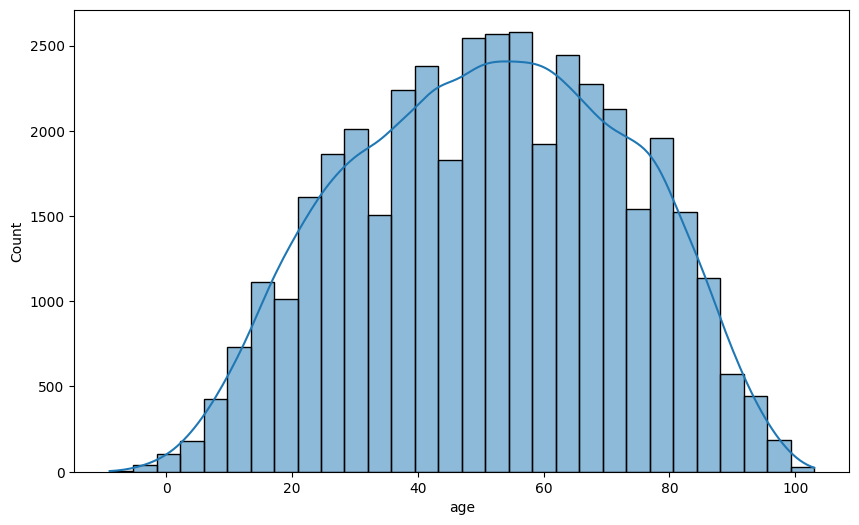

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(data.age, kde = True, bins = 30)

**Group the data by gender and calculate the mean age for each group**

In [ ]:
age_by_gender = data.groupby('sex')['age'].mean()
print(age_by_gender)

sex
0.0    54.111612
1.0    49.096301
Name: age, dtype: float64


**Create a boxplot to visualize the distribution of age stratified by gender**

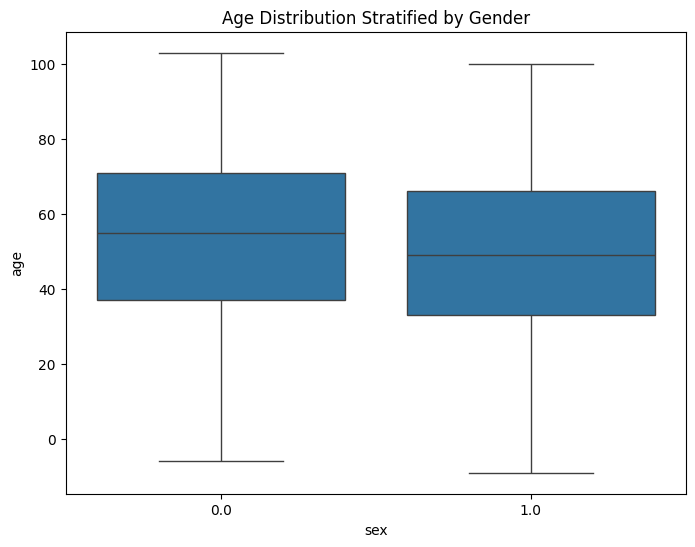

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=data)
plt.title('Age Distribution Stratified by Gender')
plt.show()

A boxplot, also known as a box-and-whisker plot, is used to visually display the distribution of numerical data and to identify potential outliers.

**The Box:** The box represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom of the box is the first quartile (Q1), and the top is the third quartile (Q3).
The Line in the Box: This line represents the median (the middle value) of the data.

**The Whiskers:** The lines extending from the box (whiskers) typically represent 1.5 times the IQR. Data points beyond the whiskers are often considered potential outliers.

**Outliers:** Individual points plotted outside the whiskers are potential outliers, indicating values that are significantly different from the rest of the data.
By looking at a boxplot, you can quickly assess the central tendency, spread, skewness, and the presence of outliers in your data.4

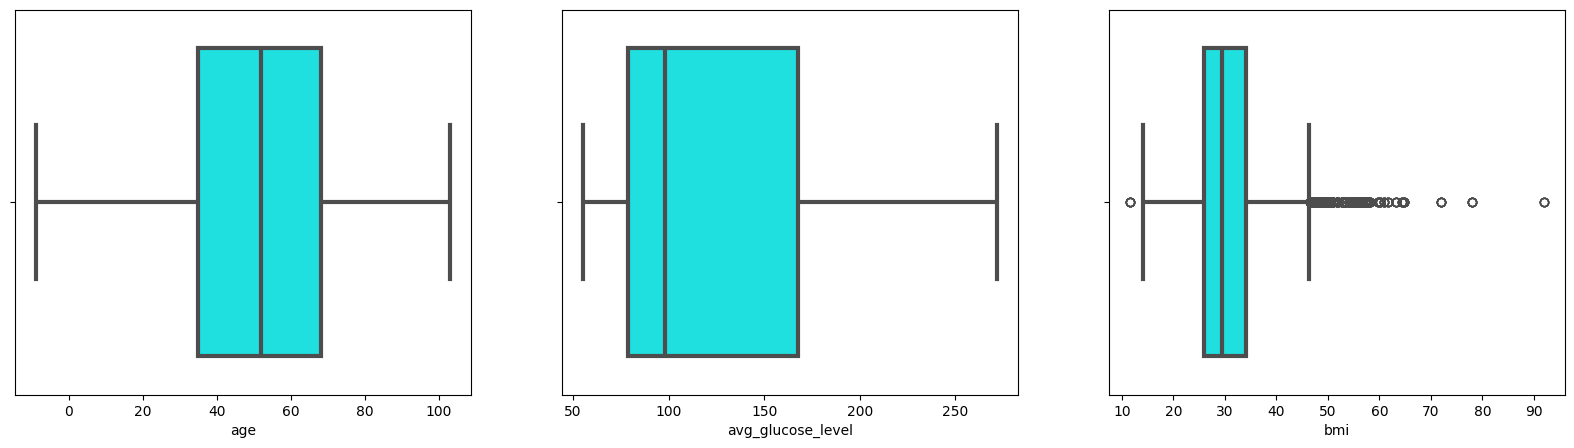

In [ ]:
fig, sub_plot = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(x = data['age'], ax = sub_plot[0], color = 'cyan', linewidth = 3)
sns.boxplot(x = data['avg_glucose_level'], ax = sub_plot[1], color = 'cyan', linewidth = 3)
sns.boxplot(x = data['bmi'], ax = sub_plot[2], color = 'cyan', linewidth = 3)
plt.show()

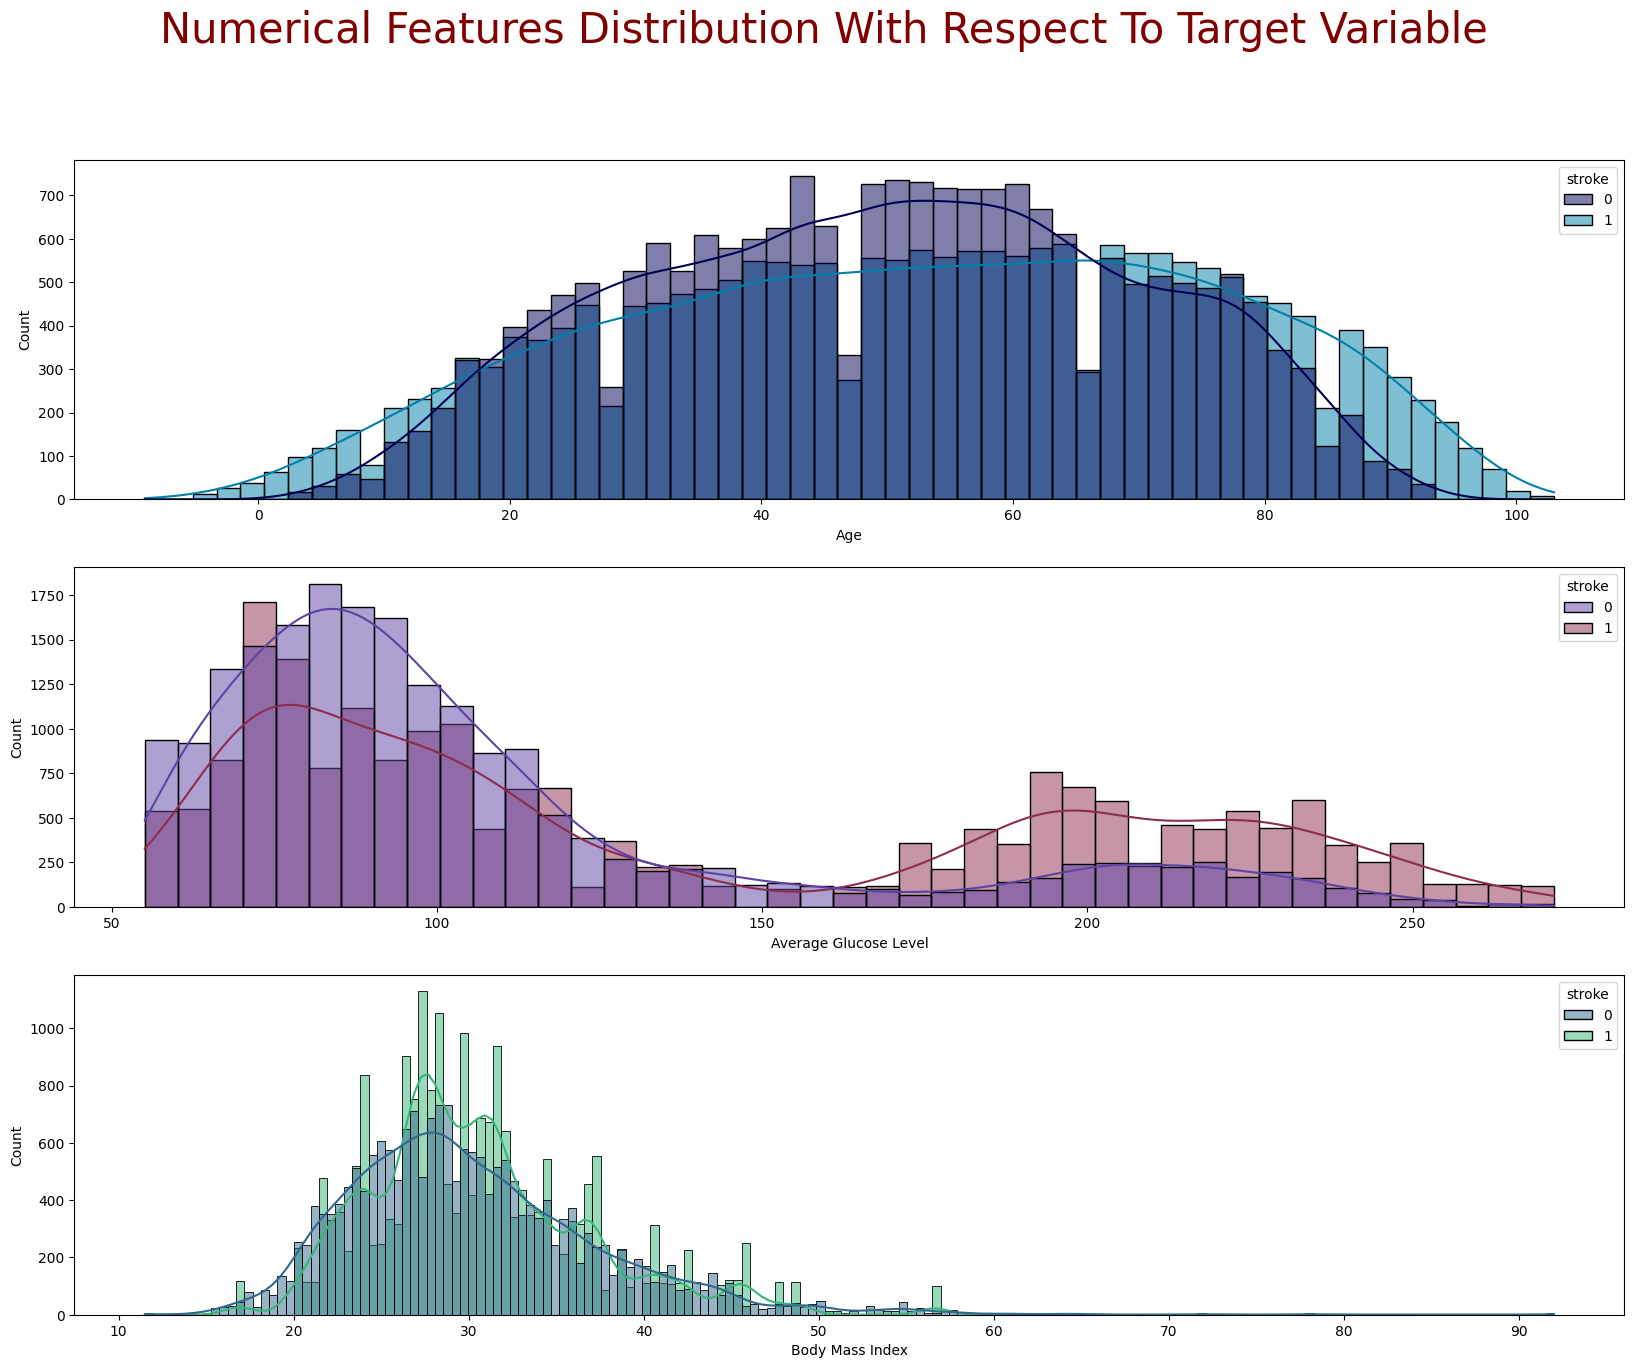

In [ ]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
plt.suptitle('Numerical Features Distribution With Respect To Target Variable', fontsize = 30, color = 'maroon')
sns.histplot(x = data['age'], hue = data['stroke'], kde = True, ax = ax[0], palette = 'ocean')
ax[0].set(xlabel = 'Age')
sns.histplot(x = data['avg_glucose_level'], hue = data['stroke'], kde = True, ax = ax[1], palette = 'twilight')
ax[1].set(xlabel = 'Average Glucose Level')
sns.histplot(x = data['bmi'], hue = data['stroke'], kde = True, ax = ax[2], palette = 'viridis')
ax[2].set(xlabel = 'Body Mass Index')
plt.show()

In [ ]:
correlation_matrix_data = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
correlation_matrix_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,63.0,0,1,228.69,36.6,1
1,42.0,0,1,105.92,32.5,1
2,61.0,0,0,171.23,34.4,1
3,41.0,1,0,174.12,24.0,1
4,85.0,0,0,186.21,29.0,1


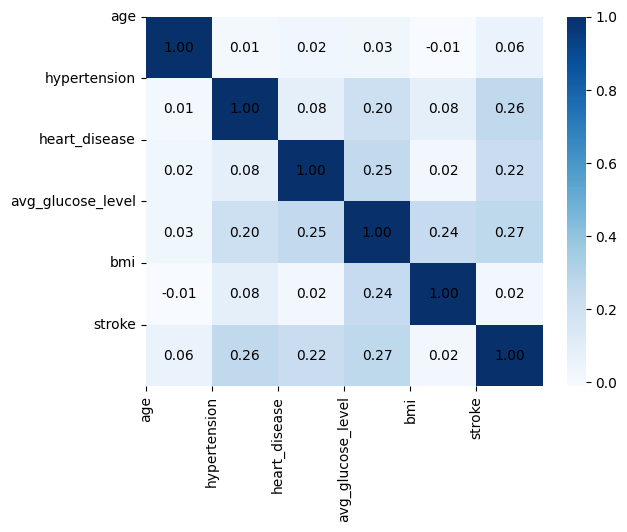

In [ ]:
correlation_matrix = correlation_matrix_data.corr()
sns.heatmap(correlation_matrix, cmap = 'Blues')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = '{:.2f}'.format(correlation_matrix.iloc[i, j])
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

**THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
features = ["age",'hypertension', 'heart_disease', 'ever_married', 'work_type', 'bmi']
X = data[features] # features relevant to the stroke outcome
y = data['stroke'] # output we're trying to predict

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2)
print(f'{len(train_X)} {len(train_y)} {len(val_X)} {len(val_y)}')

32728 32728 8182 8182


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: the number of decision trees in the forest.
# Increasing this hyperparameter generally improves the performance of
# the model but also increases the computational cost of training and
# predicting.
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

**PREDICTIONS**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.metrics import classification_report


predictions = rf_classifier.predict(val_X) # predict using the validation set

accuracy = accuracy_score(val_y, predictions) # compare the predictions with the validation set to obtain the accuracy

confusion = confusion_matrix(val_y, predictions)

classification_report = classification_report(val_y, predictions)

print(f'Accuracy {accuracy}')
print(f'Confusion matrix: \n {confusion}')
print(f'Classification Report: \n {classification_report}')

Accuracy 0.877658274260572
Confusion matrix: 
 [[3481  624]
 [ 377 3700]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      4105
           1       0.86      0.91      0.88      4077

    accuracy                           0.88      8182
   macro avg       0.88      0.88      0.88      8182
weighted avg       0.88      0.88      0.88      8182



**USING SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(train_X, train_y)

SVC(kernel='linear', random_state=0)

In [21]:
svm_predictions = svm_model.predict(val_X)

accuracy = accuracy_score(val_y, svm_predictions) # compare the predictions with the validation set to obtain the accuracy

confusion = confusion_matrix(val_y, svm_predictions)

classification_report_svm = classification_report(val_y, svm_predictions)

print(f'Accuracy {accuracy}')
print(f'Confusion matrix: \n {confusion}')
print(f'Classification Report: \n {classification_report_svm}')

Accuracy 0.6537521388413591
Confusion matrix: 
 [[3485  620]
 [2213 1864]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.85      0.71      4105
           1       0.75      0.46      0.57      4077

    accuracy                           0.65      8182
   macro avg       0.68      0.65      0.64      8182
weighted avg       0.68      0.65      0.64      8182

